<a href="https://colab.research.google.com/github/deekshitha9131/unemployment_analysis/blob/feature-analysis/Unemployment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv("unemployment_data.csv")
print(df.head())
print("\n\n")
print(df.shape)


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  



(768, 7)


In [5]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [6]:
print(df.isnull().sum())
df = df.dropna()
df[' Date'] = pd.to_datetime(df[' Date'])

df = df.sort_values(' Date')


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64


/tmp/ipython-input-1010439804.py:3: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df[' Date'] = pd.to_datetime(df[' Date'])


In [7]:
df.describe()

,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740,740.000000,7.400000e+02,740.000000
mean,2019-12-12 18:36:58.378378496,11.787946,7.204460e+06,42.630122
min,2019-05-31 00:00:00,0.000000,4.942000e+04,13.330000
25%,2019-08-31 00:00:00,4.657500,1.190404e+06,38.062500
50%,2019-11-30 00:00:00,8.350000,4.744178e+06,41.160000
75%,2020-03-31 00:00:00,15.887500,1.127549e+07,45.505000
max,2020-06-30 00:00:00,76.740000,4.577751e+07,72.570000
std,NaN,10.721298,8.087988e+06,8.111094


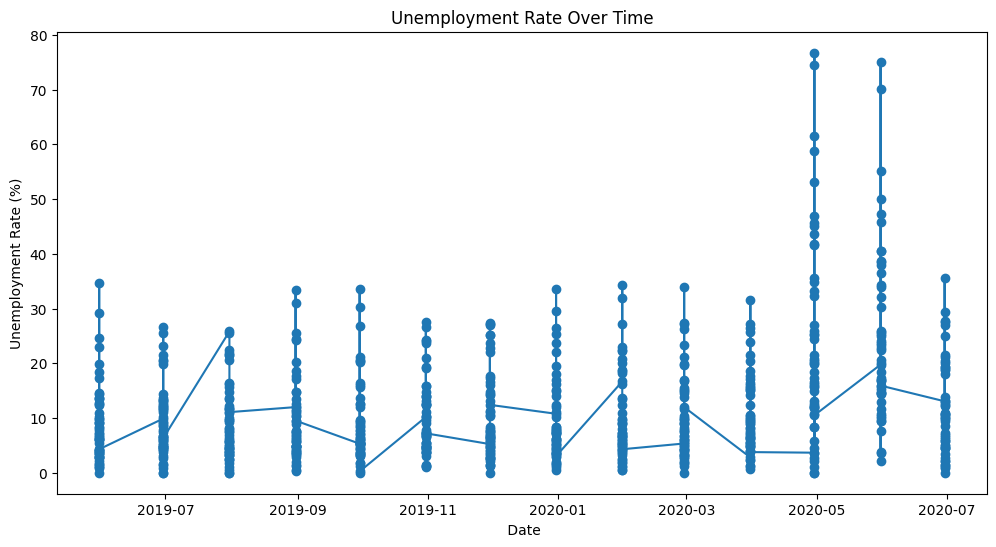

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df[' Date'], df[' Estimated Unemployment Rate (%)'], marker='o')
plt.title('Unemployment Rate Over Time')
plt.xlabel(' Date')
plt.ylabel('Unemployment Rate (%)')
plt.show()


In [9]:
print(df[' Estimated Unemployment Rate (%)'].describe())

count    740.000000
mean      11.787946
std       10.721298
min        0.000000
25%        4.657500
50%        8.350000
75%       15.887500
max       76.740000
Name:  Estimated Unemployment Rate (%), dtype: float64


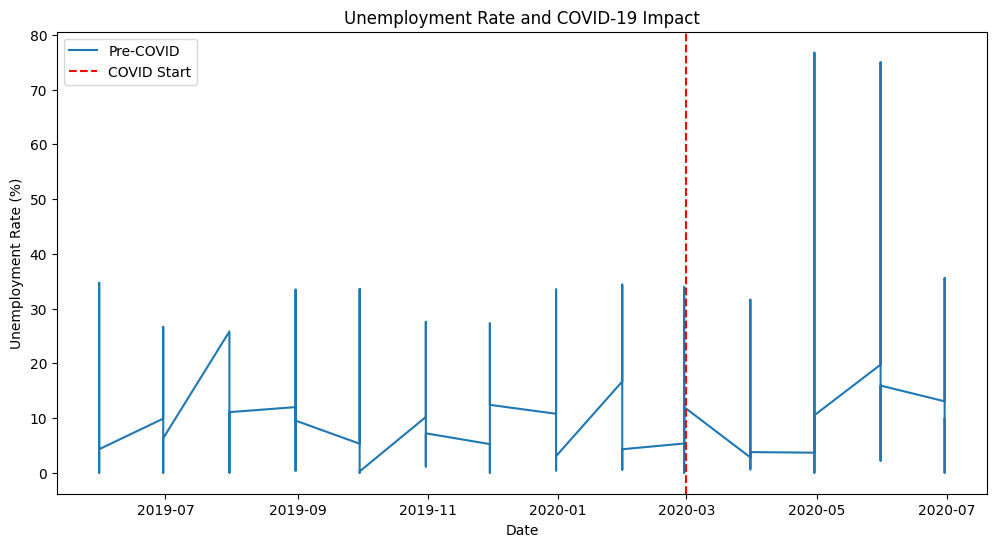

In [10]:
covid_start = '2020-03-01'

plt.figure(figsize=(12,6))
plt.plot(df[' Date'], df[' Estimated Unemployment Rate (%)'], label='Pre-COVID')
plt.axvline(pd.to_datetime(covid_start), color='red', linestyle='--', label='COVID Start')
plt.title('Unemployment Rate and COVID-19 Impact')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()

In [11]:
pre_covid = df[df[' Date'] < covid_start][' Estimated Unemployment Rate (%)'].mean()
during_covid = df[df[' Date'] >= covid_start][' Estimated Unemployment Rate (%)'].mean()

print(f"Average Unemployment before COVID: {pre_covid:.2f}%")
print(f"Average Unemployment during COVID: {during_covid:.2f}%")


Average Unemployment before COVID: 9.51%
Average Unemployment during COVID: 17.77%


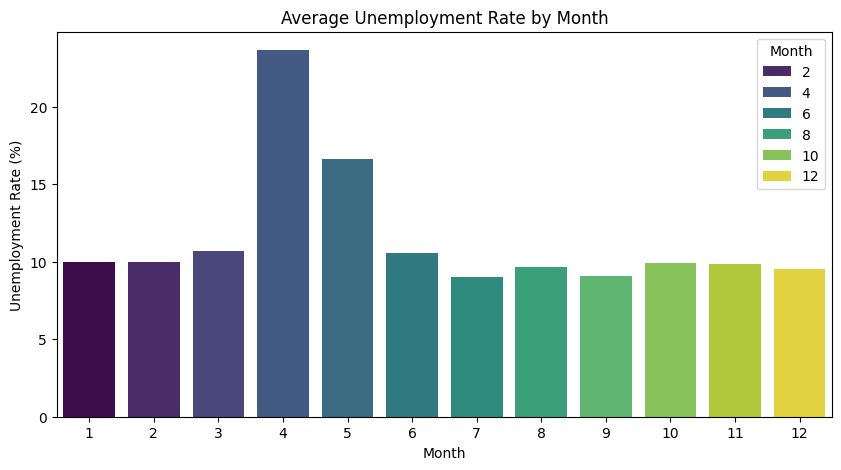

<Axes: xlabel='Month'>

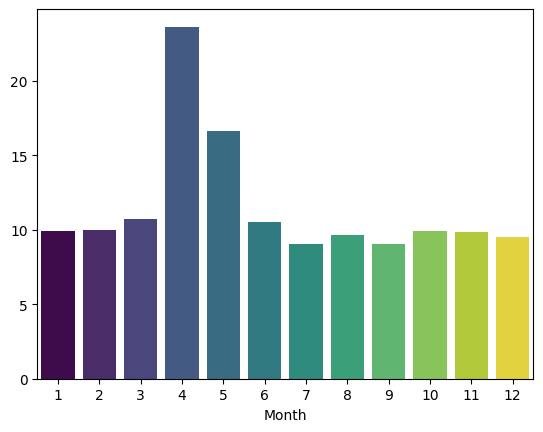

In [15]:
df['Month'] = df[' Date'].dt.month
monthly_avg = df.groupby('Month')[' Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10,5))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, hue=monthly_avg.index,
            palette='viridis')
plt.title('Average Unemployment Rate by Month')
plt.xlabel('Month')
plt.ylabel('Unemployment Rate (%)')
plt.show()
sns.barplot(x=monthly_avg.index, y=monthly_avg.values, hue=monthly_avg.index,
            palette='viridis', legend=False)


In [13]:
print("Peak unemployment:", df[' Estimated Unemployment Rate (%)'].max(), "on", df.loc[df[' Estimated Unemployment Rate (%)'].idxmax(), ' Date'])
print("Lowest unemployment:", df[' Estimated Unemployment Rate (%)'].min(), "on", df.loc[df[' Estimated Unemployment Rate (%)'].idxmin(),' Date'])

Peak unemployment: 76.74 on 2020-04-30 00:00:00
Lowest unemployment: 0.0 on 2019-05-31 00:00:00
